# Colación 

### Creación del entorno virtual de desarrollo
#### to be applied outside of colab. In colab ```pip3 install collatex Levenshtein notebook``` should be enough


In [ ]:
!python3 -m venv collatex-venv

!source collatex-venv/bin/activate

!pip3 install collatex Levenshtein notebook

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/collatex-venv/bin/python3

/bin/bash: line 1: collatex-venv/bin/activate: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.9 MB/s eta 0:00:00
  Created wheel for collatex: filename=collatex-2.3-py2.py3-none-any.whl size=70000 sha256=e195e1563694fa4e8b47b0333f773b14a10ab650b11111241410d407b46c5d3b
  Stored in

In [ ]:
#!pip3 install collatex Levenshtein notebook

# Link to download .txt files:
Dossier: https://drive.google.com/drive/folders/1uwIkbnU0tDfmpM00uazVWdx31tFWUKwq?usp=drive_link
- Trancoso: https://drive.google.com/drive/folders/1WmQgxTMM3Lk3j4GC7BKqkgOA3cTL2bL5?usp=drive_link
- mesma familia: https://drive.google.com/drive/folders/18qYsOiqHeOhfF8SnwmmU-9okDKhs3LDq?usp=drive_link
- familias diferentes: https://drive.google.com/drive/folders/1NyzRQu3OZAIkSYddlCHhrftxO_nysNs_?usp=drive_link
- Testemunhos: https://drive.google.com/drive/folders/17SRgkgZJyVo5sNW3XxmUH6GhrLoQ1F31?usp=drive_link


# Upload txt files to *input_files* ↓


In [ ]:
# Creates directory for input files (.txt format without ponctuation or breaklines)
!mkdir input_files

In [ ]:
# Creates directory for output files
!mkdir output_files

In [ ]:
# Import libraries
from collatex import *
import json
import os

## Execute next block if files contain punctuation and line breaks

In [ ]:
import string
import re

# Input files to be processed
directory_path = 'input_files'

# Preprocess txt files
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)

        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

        # Remove punctuation, replace newline characters with spaces, and replace upper with lowercase (does not support hyphenation, as there was none. If there is, it should be removed)
        content = re.sub(r'\s{2,}', ' ', content.replace('\n', ' ').translate(str.maketrans('', '', string.punctuation)).lower())

        # Save the changes on the same file
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(content)

        print(f"Processed {filename}")

Processed trancoso_A.txt
Processed trancoso_C.txt
Processed trancoso_B.txt
Processed trancoso_D.txt


In [ ]:

"""
This script performs text collation on .txt files from a specified directory
and outputs the result to a CSV file.
"""

input_files_path = "input_files/"
output_files_path = "output_files/"
text_name = "trancoso_segmentation" #change it for your text name
collation = Collation()

# Verify input directory exists
if not os.path.exists(input_files_path):
    raise FileNotFoundError(f"Input directory {input_files_path} does not exist.")

# Verify output directory exists; if not, create it
if not os.path.exists(output_files_path):
    os.makedirs(output_files_path)

# Get list of .txt files
file_names = [f for f in os.listdir(input_files_path) if f.endswith('.txt')]
witness_names = {}

for file_name in file_names:
    try:
    # Extract witness name from file name
      witness_name = file_name
      witness_names[file_name] = witness_name
    except IndexError:
        print(f"Error extracting witness name from file {file_name}")


    # Add each witness content to the collation
    try:
        with open(os.path.join(input_files_path, file_name), encoding='utf-8') as f:
            witness_content = f.read()
            collation.add_plain_witness(witness_name, witness_content)
    except Exception as e:
        print(f"Error reading {file_name}: {e}")
# check witness name and print them
for file, witness in witness_names.items():
    print(f"File: {file} -> Witness name: {witness}")

# Perform the collationTrue
alignment_table = collate(collation, segmentation=False, layout='vertical', near_match=True, output='xml') # para la segmentación: segmentation=True y near_match=False
#print(alignment_table)
# Save the collation result to a CSV file (change the extension according to your needs –json, -xml)
try:
    with open(f"{output_files_path}collatio_{text_name}.xml", 'w', encoding='utf-8') as f:
        f.write(alignment_table)
except Exception as e:
    print(f"Error writing to output file: {e}")


File: trancoso_A.txt -> Witness name: trancoso_A.txt
File: trancoso_C.txt -> Witness name: trancoso_C.txt
File: trancoso_B.txt -> Witness name: trancoso_B.txt
File: trancoso_D.txt -> Witness name: trancoso_D.txt


# Vamos ver alguns resultados do CollateX

In [ ]:
alignment_table_vertical = collate(collation, layout='vertical', segmentation=False )
print(alignment_table_vertical)

In [ ]:
alignment_table_vertical = collate(collation, layout='vertical', segmentation=True )
print(alignment_table_vertical)

In [ ]:
alignment_table = collate(collation, layout='vertical', output="html")
print(alignment_table)

trancoso_A.txt,trancoso_C.txt,trancoso_B.txt,trancoso_D.txt
in nomine sancte etindiuidue trinitatispatris et filii etspiritus sanctiunius summi dei,in nomine sancte etindiuidue trinitatispatris et filii etspiritus sanctiunius summi dei,in nomine sancte etindiuidue trinitatispatris et filii etspiritus sanctiunius summi dei,in nomine sancte etindiuidue trinitatispatris et filii etspiritus sanctiunius summi dei
facimus,facimus,facimus,façimus
istam cartam inipsius nominetrinitatis ego rexalfonsus portugaliaepariter cum filiomeo rege,istam cartam inipsius nominetrinitatis ego rexalfonsus portugaliaepariter cum filiomeo rege,istam cartam inipsius nominetrinitatis ego rexalfonsus portugaliaepariter cum filiomeo rege,istam cartam inipsius nominetrinitatis ego rexalfonsus portugaliaepariter cum filiomeo rege
sancius,sancio,sancio,sancio
et cum filias measuobis homines de,et cum filias measuobis homines de,et cum filias measuobis homines de,et cum filias measuobis homines de
troncoso,troncosum,troncosum,trancoso
qui ibidem,qui ibidem,qui ibidem,qui ibidem
populatores,popolatores,populatores,populatores
estis per mandatum,estis per mandatum,estis per mandatum,estis per mandatum
meum,meum,meum,miym


None


In [ ]:
alignment_table = collate(collation, layout='vertical', output="html2", segmentation=False)
print(alignment_table)

None


# Near match or not near match

In [ ]:
collation = Collation()


In [ ]:
collation.add_plain_witness( "A", "me gusta lisboa")
collation.add_plain_witness( "B", "Me gusta la ciudad Lisboa" )
collation.add_plain_witness( "C", "Me gusta el país Portugal" )

In [ ]:
alignment_table = collate(collation, layout='vertical', segmentation=False )

In [ ]:
print(alignment_table)

+--------+--------+----------+
|   A    |   B    |    C     |
+--------+--------+----------+
|   me   |   Me   |    Me    |
+--------+--------+----------+
| gusta  | gusta  |  gusta   |
+--------+--------+----------+
| lisboa |   la   |    el    |
+--------+--------+----------+
|   -    | ciudad |   país   |
+--------+--------+----------+
|   -    | Lisboa | Portugal |
+--------+--------+----------+


In [ ]:
alignment_table = collate(collation, layout='vertical', segmentation=False, near_match=True )

In [ ]:
print(alignment_table)

+--------+--------+----------+
|   A    |   B    |    C     |
+--------+--------+----------+
|   me   |   Me   |    Me    |
+--------+--------+----------+
| gusta  | gusta  |  gusta   |
+--------+--------+----------+
|   -    |   la   |    el    |
+--------+--------+----------+
|   -    | ciudad |   país   |
+--------+--------+----------+
| lisboa | Lisboa | Portugal |
+--------+--------+----------+


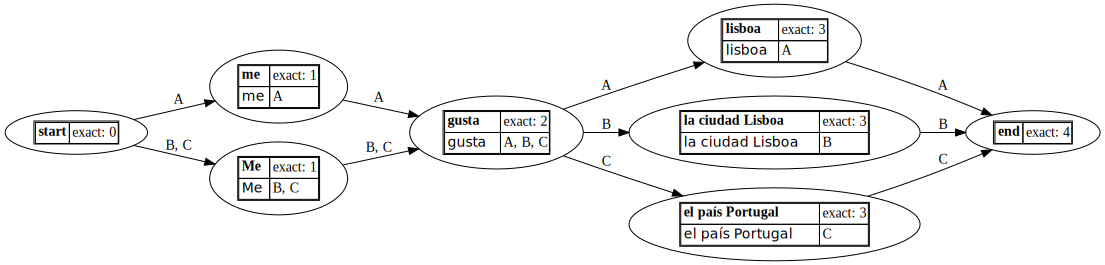

In [ ]:
graph = collate( collation, output="svg" )

In [ ]:
collation = Collation()

In [ ]:
collation.add_plain_witness( "A", "me gusta lisboa")
collation.add_plain_witness( "B", "me gusta la ciudad lisboa" )
collation.add_plain_witness( "C", "me gusta el pais portugal" )

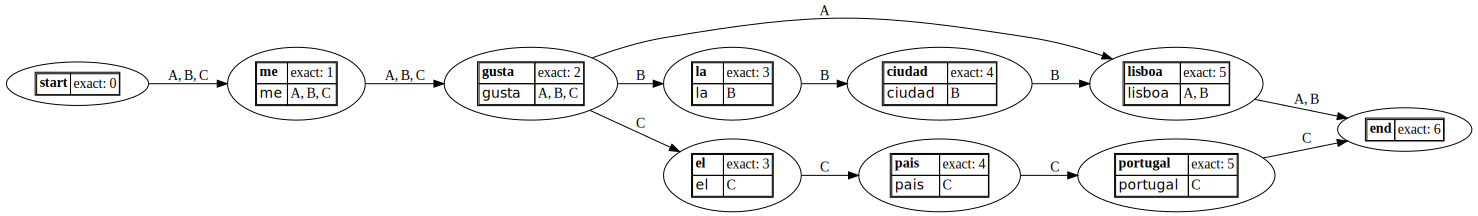

In [ ]:
graph = collate( collation, output="svg", near_match=True, segmentation=False  )

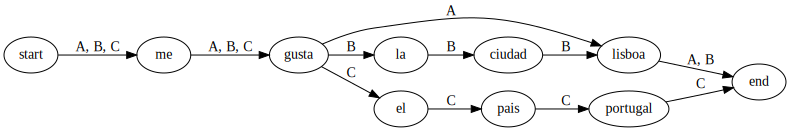

In [ ]:
graph = collate( collation, output="svg_simple", near_match=True, segmentation=False  )